<a href="https://colab.research.google.com/github/Abhisekh19/data-science/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOTEL BOOKING ANALYSIS**



---







name=**ABHISEKH KUMAR THAKUR**

team type=**INDIVIDUAL**

project type=**Exploratory data analysis**

**Project Summary**

This is a project on hotel booking analysis.I have tried to get general insights from the data using various cleaning and treatments of outliers .
I have tried to find patterns and average sense of demands in hotel types and customers preferences in hotel industry based on the given data.This project is basically a Exploratry Data Analysis project which will help any stakeholder to understand the data.
And most importantly ,I have tried to analyse only booking part using various exploratory data analysis methods.

# GITHUB LINK

https://github.com/Abhisekh19/data-science/blob/c9df9123e0492d099c05a90324a345459bbdd6cf/hotel_booking_analysis.ipynb


***Importing data***

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np



In [ ]:
#loading the dataset hotel bookings to df
path='/content/drive/MyDrive/csvfiles/Hotel Bookings.csv'
df=pd.read_csv(path)

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


***Cleaning data***


In [ ]:
# for checking if there is any null values
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Some columns have null values which should be treated before further analysis.

Treating outliers

In [ ]:
#for children
df['children'].median()

0.0

In [ ]:
df['children'].mode()

0    0.0
Name: children, dtype: float64

In [ ]:
round(df['children'].mean())

0

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [ ]:
#we will replace the null values with median for children
df['children'].fillna(df['children'].median(),inplace=True)

In [ ]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


after filling values, children column no longer have any null values

In [ ]:
#for country column
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#for country
df[df['country'].isna()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13


In [ ]:
#we will replace the null values of country with the most frequent observation
df['country'].mode()[0]

'PRT'

Country column have PRT as most repeated which can be used to fill null values in country column

In [ ]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Agent and company columns have high number of null values and also are not of much importance in hotel booking, so we will drop these including some more

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df_new=df.copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Dropping unnecesary columns which will be not used for further analysis here
df_new.drop(['arrival_date_week_number','arrival_date_day_of_month','agent','company','previous_cancellations','previous_bookings_not_canceled'],axis=1,inplace=True)

In [ ]:
df_new.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
dtype: int64

Data has been cleaned for further EDA

In [ ]:
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,0,1,1,0.0,0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,0,2,2,0.0,0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Now we will explore our data through various visualizations and try to remove outliers

<function matplotlib.pyplot.show(close=None, block=None)>

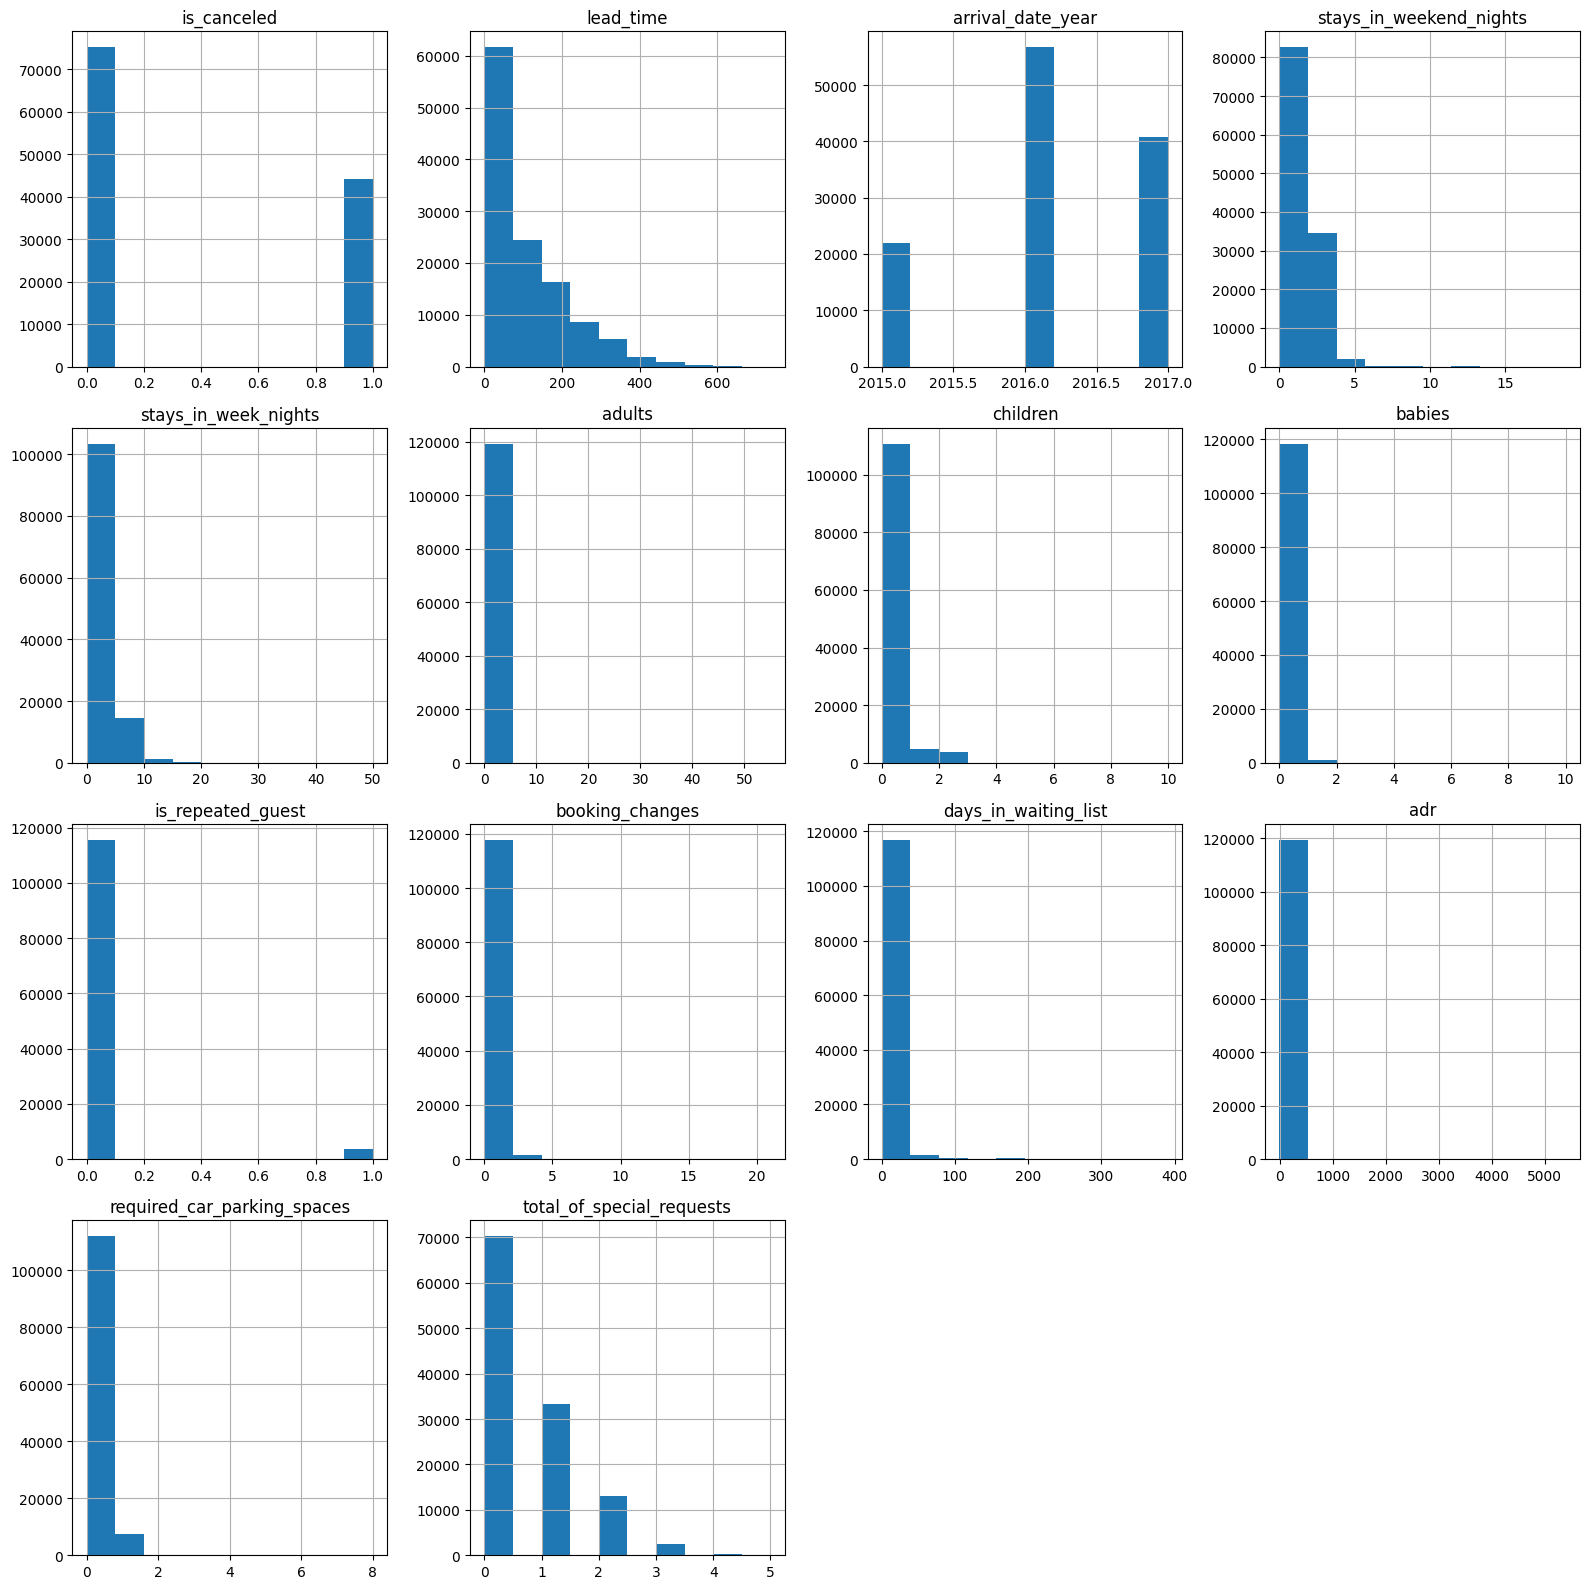

In [ ]:
#Lets take a quick visual of our data
df_new.hist(figsize=(16,16))
plt.show

In [ ]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   arrival_date_year            119390 non-null  int64  
 4   arrival_date_month           119390 non-null  object 
 5   stays_in_weekend_nights      119390 non-null  int64  
 6   stays_in_week_nights         119390 non-null  int64  
 7   adults                       119390 non-null  int64  
 8   children                     119390 non-null  float64
 9   babies                       119390 non-null  int64  
 10  meal                         119390 non-null  object 
 11  country                      119390 non-null  object 
 12  market_segment               119390 non-null  object 
 13 

<function matplotlib.pyplot.show(close=None, block=None)>

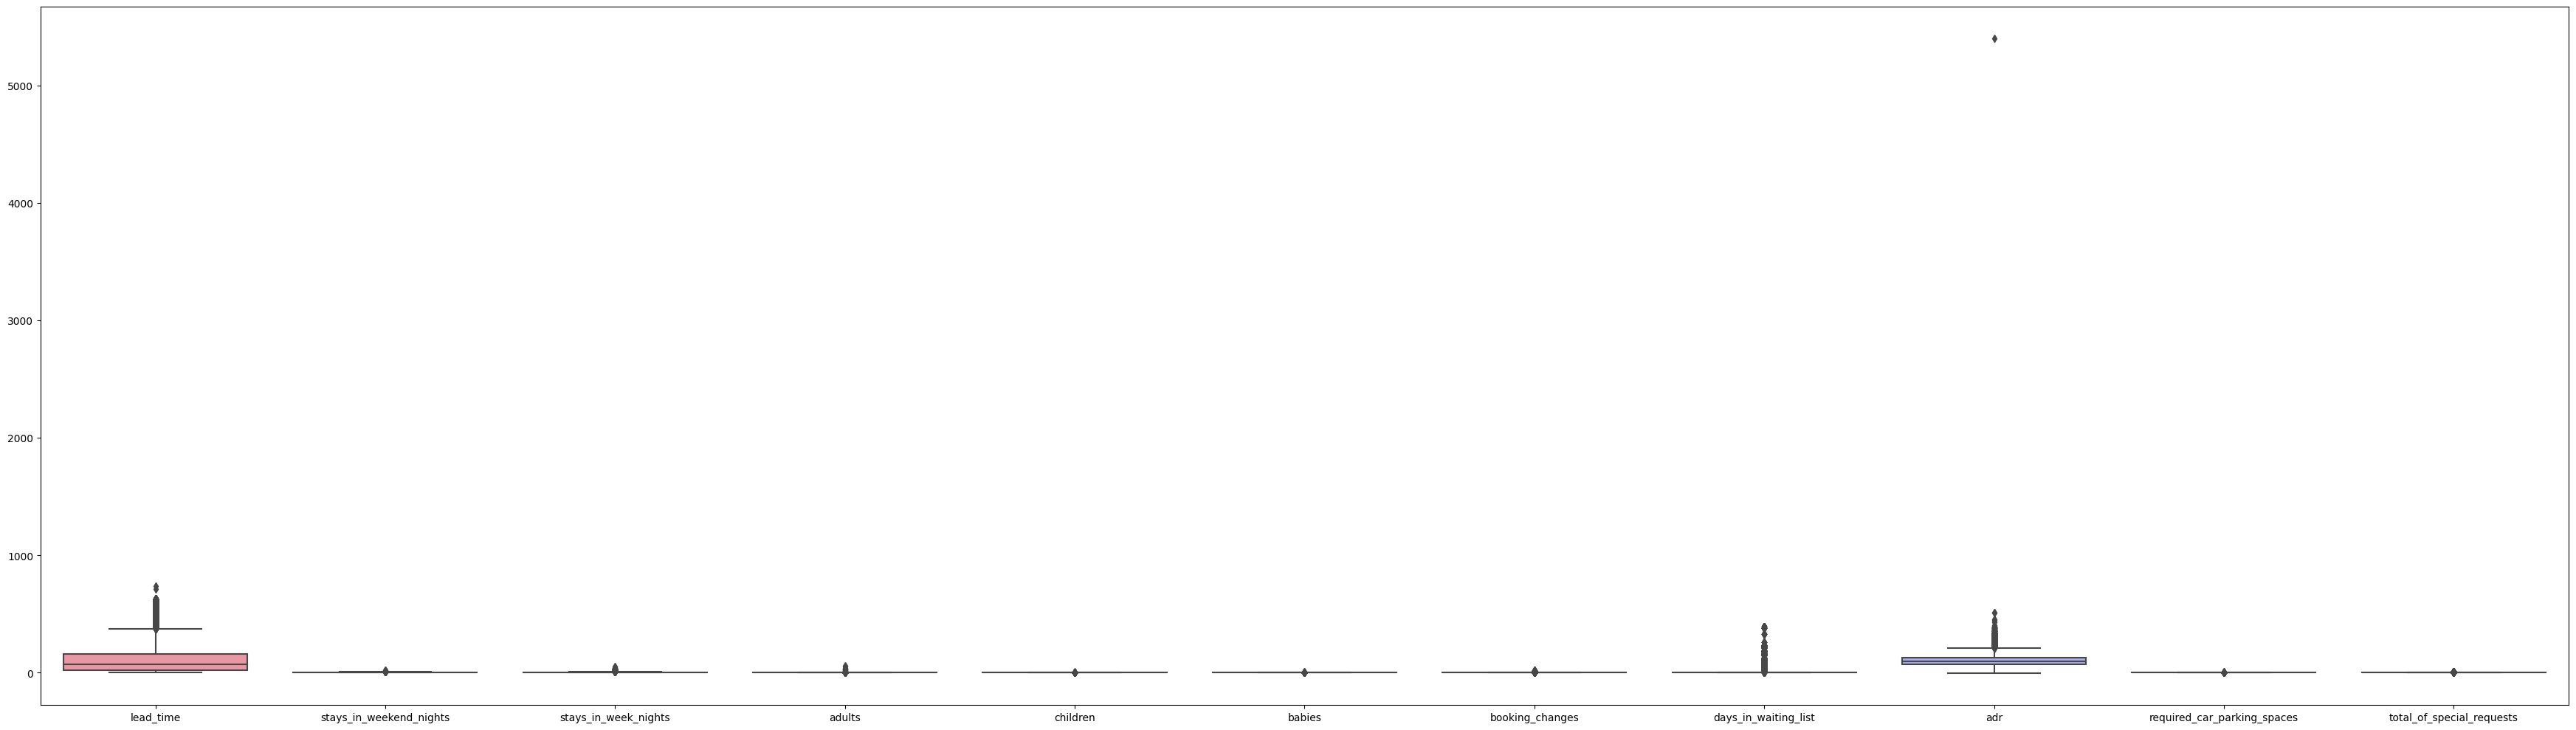

In [ ]:
#for outliers
plt.figure(figsize=(35,10))
sns.boxplot(data=df_new[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']])
plt.show

Text(0.5, 1.0, 'lead time')

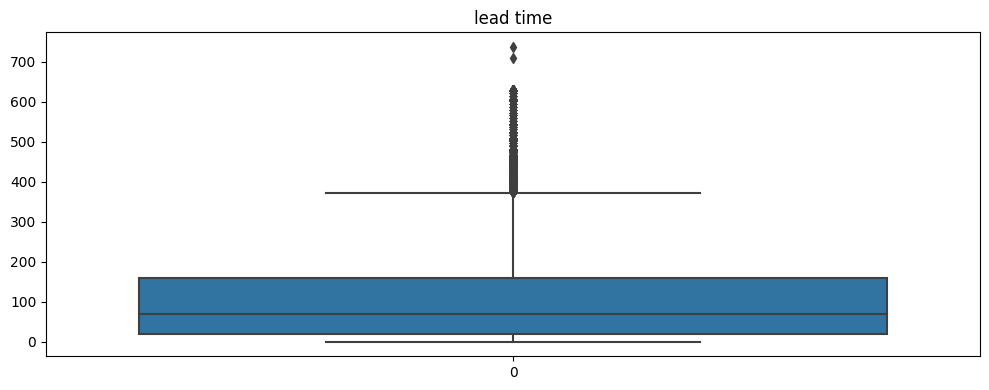

In [ ]:
#all columns looks good except for 'lead time','days in waiting list' and 'adr'
sns.boxplot(data=df_new['lead_time'])
plt.title('lead time')

Text(0.5, 1.0, 'adr')

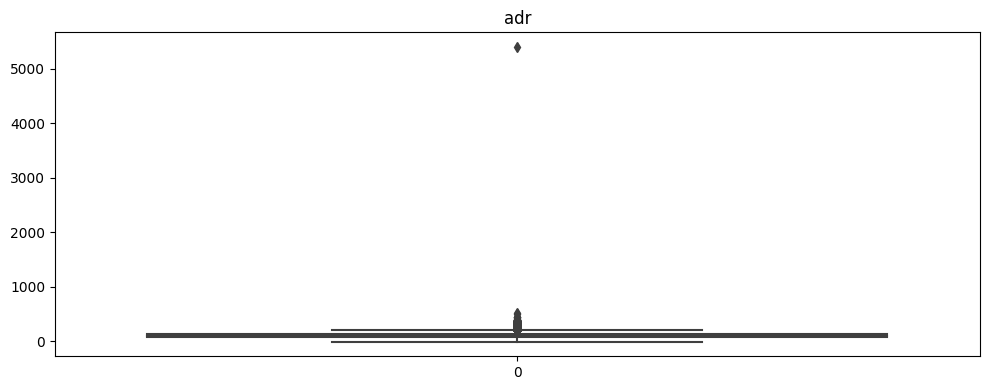

In [ ]:
sns.boxplot(data=df_new['adr'])
plt.title('adr')

Removing outliers


array([[<Axes: title={'center': 'lead_time'}>]], dtype=object)

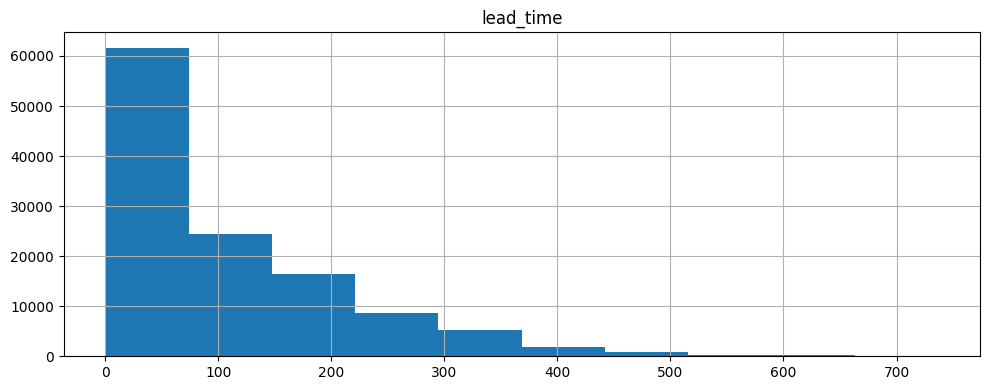

In [ ]:
#for lead time
df_new.hist('lead_time')


<Axes: >

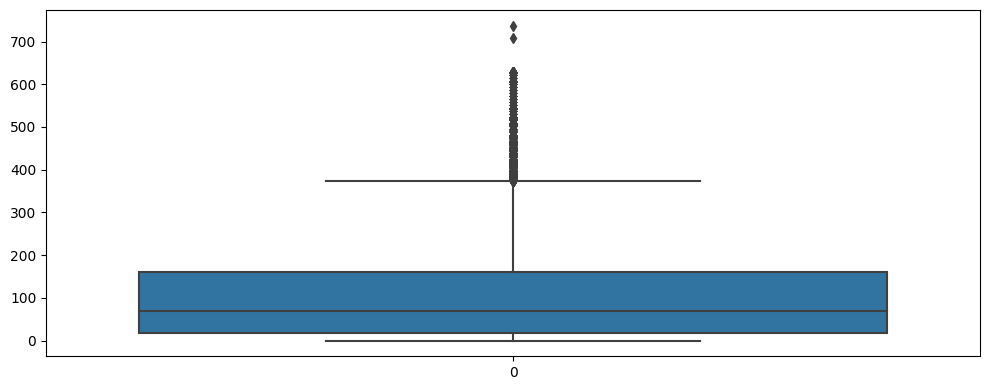

In [ ]:
sns.boxplot(data=df_new['lead_time'])

In [ ]:
df_new['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [ ]:
q1=df_new['lead_time'].quantile(0.25)
q3=df_new['lead_time'].quantile(0.75)
median=df_new['lead_time'].quantile(0.5)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower,upper,median)

-195.0 373.0 69.0


In [ ]:
df_new.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
(df_new['lead_time']>upper).value_counts()

False    116385
True       3005
Name: lead_time, dtype: int64

In [ ]:
#For lead time, we will consider only those values which are under the upper cap
df_new=df_new[df_new['lead_time']< upper]


<Axes: >

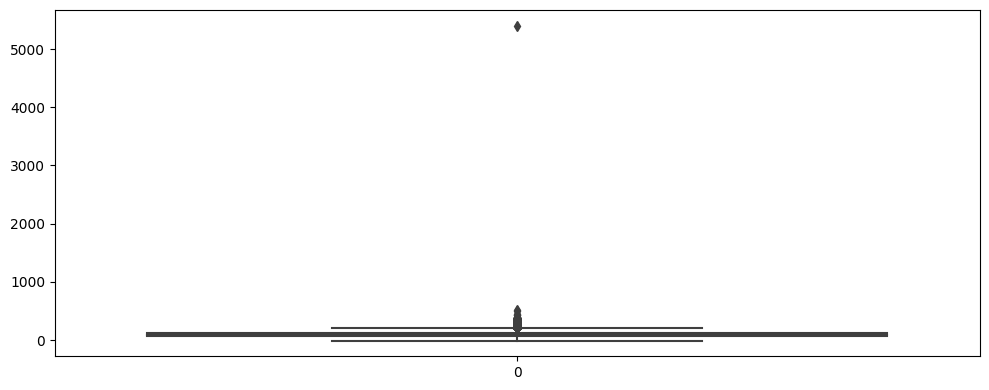

In [ ]:
#for adr, only one value is a outliers which we will treat
sns.boxplot(data=df_new['adr'])

In [ ]:
df_new[df_new['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,0,1,2,0.0,0,...,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [ ]:
#removing outlier in adr column
df_new=df_new[df_new['adr']< 5000]

In [ ]:
df_new.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000,116355.000000
mean,0.362614,95.169284,2016.150324,0.936548,2.513532,1.855245,0.106519,0.008139,0.032745,0.222887,2.010339,102.388478,0.064002,0.580130
std,0.480757,92.403416,0.709865,0.999882,1.920734,0.584586,0.403244,0.098605,0.177968,0.656002,14.187063,48.466901,0.247968,0.797434
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,66.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,152.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.635000,0.000000,1.000000
max,1.000000,372.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,21.000000,259.000000,510.000000,8.000000,5.000000


Analysis using some visualization


**Question**
What is the most preferred category for hotel booking?

Text(0.5, 1.0, 'hotel category')

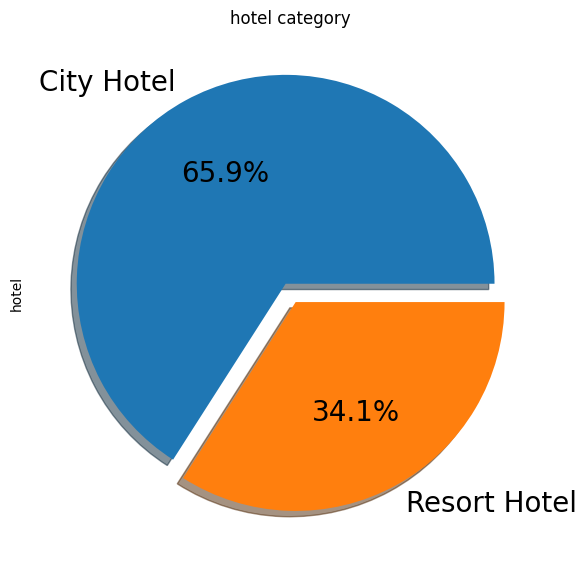

In [ ]:
#for hotel type
df_new['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(6,6),fontsize=20)
plt.title('hotel category')

**Answer**

Most bookings are coming for city hotels (66% approximately), while only 34 percent approximately of the bookings are from resort hotel.

In [ ]:
#for cancellation analysis, first we will replace the value with more interpretable one like for 0 and 1 in is_canceled
#we will replace with not canceled and cancelled repectively
df_new['is_canceled'] = df_new['is_canceled'].replace([0,1], ['not canceled', 'is canceled'])

**Question**

Of the total bookings , how much of the booking have been cancelled?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

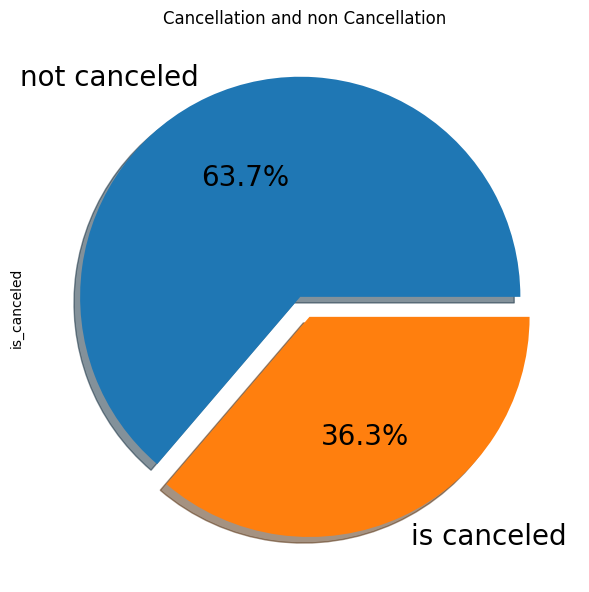

In [ ]:
df_new['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(6,6),fontsize=20)
plt.title("Cancellation and non Cancellation")

**Answer**

Approximately 36 percent of hotel bookings have been cancelled (including both resort and city hotel)

In [ ]:
#Bifurcation of cancellation along both type of hotel
df_new.groupby("hotel")['is_canceled'].value_counts()

hotel         is_canceled 
City Hotel    not canceled    45456
              is canceled     31270
Resort Hotel  not canceled    28707
              is canceled     10922
Name: is_canceled, dtype: int64

In [ ]:
#for lead time impact

**Question**
What is the avg lead time for both type of hotel?

<Axes: xlabel='lead_time', ylabel='Count'>

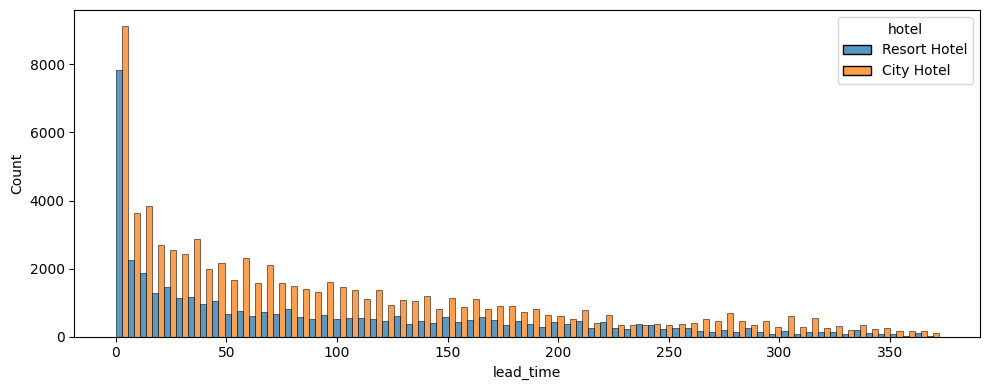

In [ ]:
#Visualizing lead time for both category
sns.histplot(x=df_new['lead_time'],hue= df_new['hotel'] ,multiple='dodge')

**Answer**

City hotel seems to have high lead time than resort hotel.
lead_time for both type of hotel seems to lie in the range of 0 to 50 days.

**Question**

What is the avg number of bookings  in days in any week and weekend?

In [ ]:
#for week and weekend nights stays.
# we will use countplot on weekd stays


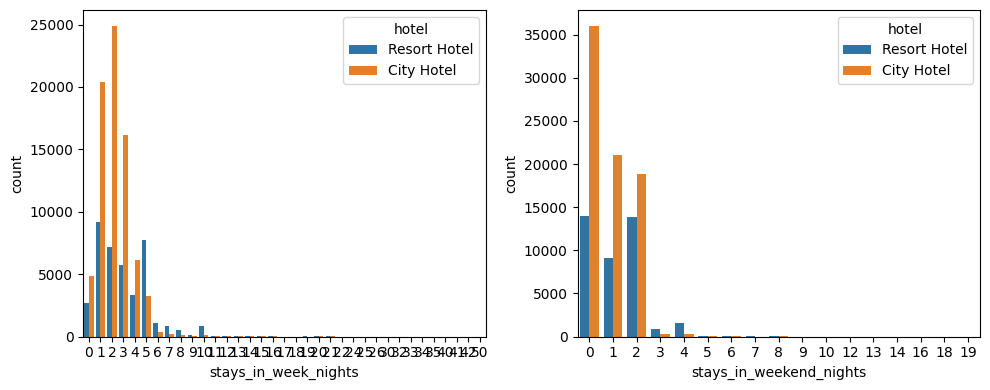

In [ ]:
plt.rcParams["figure.figsize"]=[10,4]
plt.rcParams["figure.autolayout"]=True
f,axes=plt.subplots(1,2)
sns.countplot(x=df_new['stays_in_week_nights'],hue= df_new['hotel'],ax=axes[0])
sns.countplot(x=df_new['stays_in_weekend_nights'],hue= df_new['hotel'],ax=axes[1])

plt.show()

**Answer**

As we already know the bookings for resort hotel is relatively low so weekwise bookings also less for resort hotel.
For city hotel, weekend night count is low as compared to other days.
Customers generally book for 2  days followed by 1 day booking

**Question**

What is the number of adults who come for booking in groups or individually?

In [ ]:
#2 has been appeared the most for adults booking
df_new['adults'].value_counts().sort_values(ascending=False)

2     86960
1     22722
3      6194
0       401
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

<Axes: xlabel='adults', ylabel='count'>

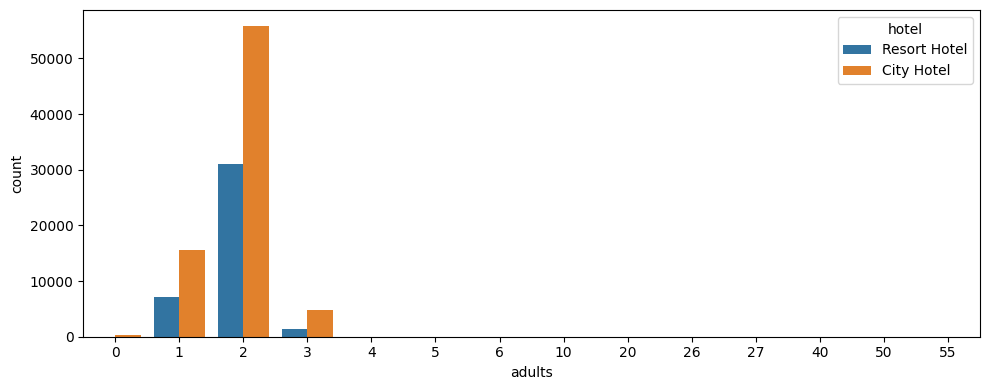

In [ ]:
sns.countplot(x=df_new['adults'],hue=df_new['hotel'])

**Answer**

Most of the bookings are for 2 adults.

**Question**

What is the most preferred meal type over hotels?

Text(0.5, 1.0, 'meal preferred')

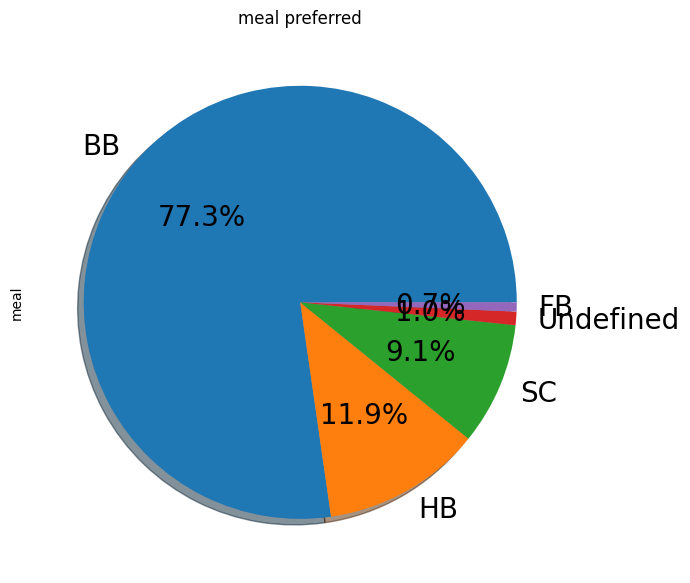

In [ ]:
df_new['meal'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(7,9),fontsize=20)
plt.title("meal preferred")

<Axes: xlabel='meal', ylabel='count'>

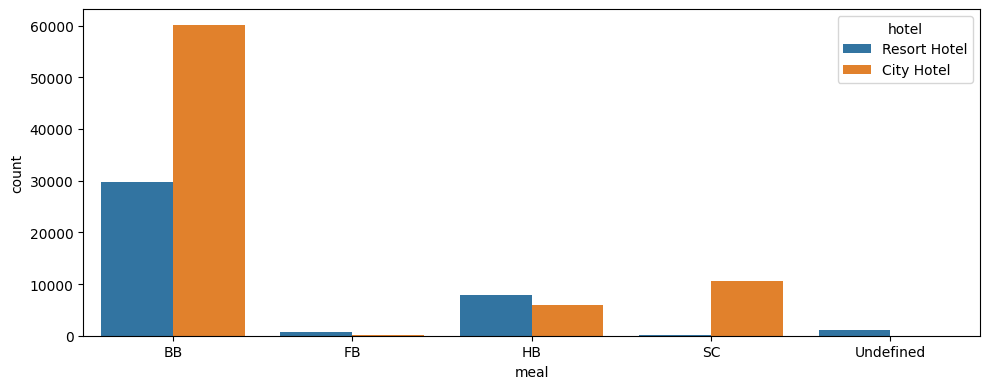

In [ ]:
sns.countplot(x=df_new['meal'],hue=df_new['hotel'])

**Answer**

77 percent of the customers preferred breakfast at bed.
Customers likes Half board meal more in resort hotels.

**Question**

From which country , bookings are comings the most?



<Axes: ylabel='country'>

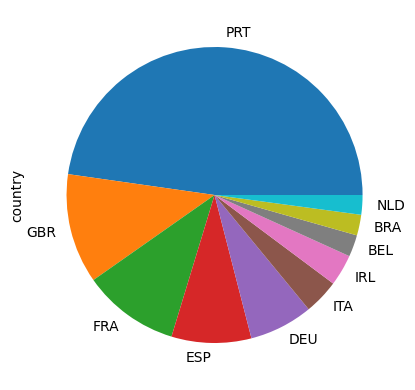

In [ ]:
#for country
df_new['country'].value_counts().head(10).plot(kind='pie')

In [ ]:
df_new['country'].value_counts(normalize=True)*100

PRT    40.369559
GBR    10.142237
FRA     8.926131
ESP     7.363672
DEU     5.881999
         ...    
KNA     0.000859
BWA     0.000859
HND     0.000859
VGB     0.000859
NAM     0.000859
Name: country, Length: 177, dtype: float64

**Answer**

40 percent of the bookings are from portugal, followed by great britain and then france.

**Question**
From which medium hotels are mostly booked?

In [ ]:
# for booking medium , we will choose market segment
df_new['market_segment'].value_counts()

Online TA        56467
Offline TA/TO    23222
Groups           17789
Direct           12601
Corporate         5295
Complementary      742
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<Axes: xlabel='market_segment', ylabel='count'>

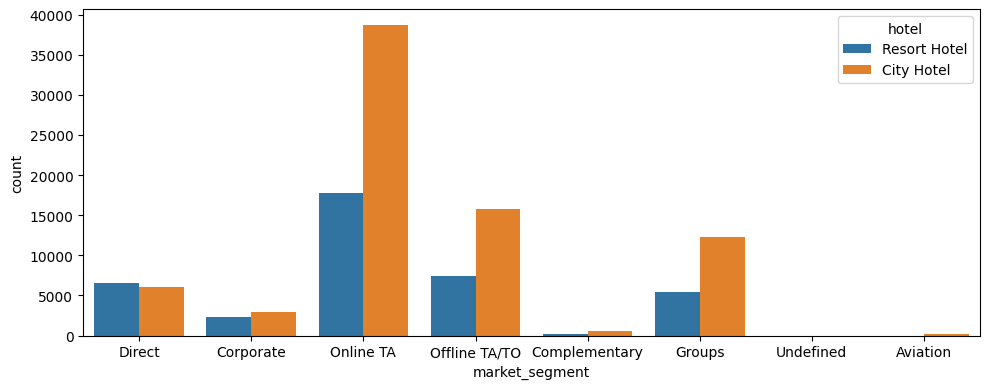

In [ ]:
sns.countplot(x=df_new['market_segment'],hue=df_new['hotel'])

**Answer**

Online booking method is most preferred.

In [ ]:
# for distribution channels summary
df_new['distribution_channel'].value_counts()

TA/TO        94938
Direct       14619
Corporate     6600
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

**Question**
What can we say about repeated guest , whether they rebook or not?

In [ ]:
df_new['is_repeated_guest'].value_counts(normalize=True)*100

0    96.725538
1     3.274462
Name: is_repeated_guest, dtype: float64

<Axes: xlabel='is_repeated_guest', ylabel='count'>

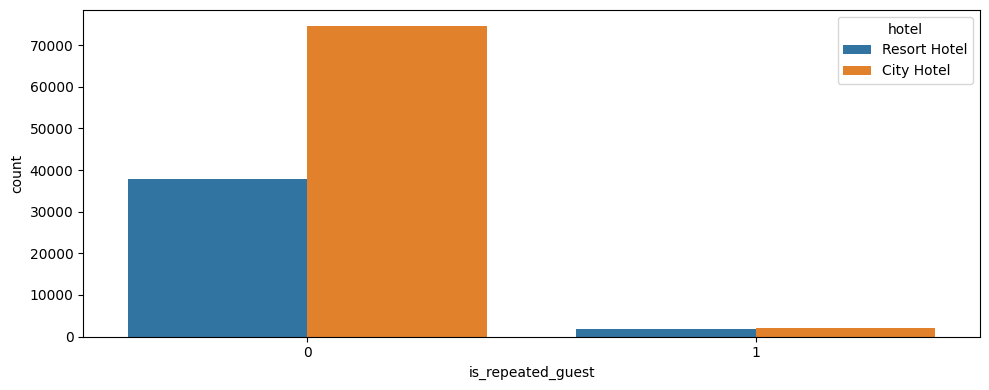

In [ ]:
sns.countplot(x=df_new['is_repeated_guest'],hue=df_new['hotel'])

**Answer**

96 percent of the customers are new which means they dont book the previous hotels in general.

**Question**

For which room types , bookings are coming the most?

In [ ]:
df_new['reserved_room_type'].value_counts()

A    83019
D    19188
E     6494
F     2896
G     2094
B     1116
C      929
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

<Axes: xlabel='reserved_room_type', ylabel='count'>

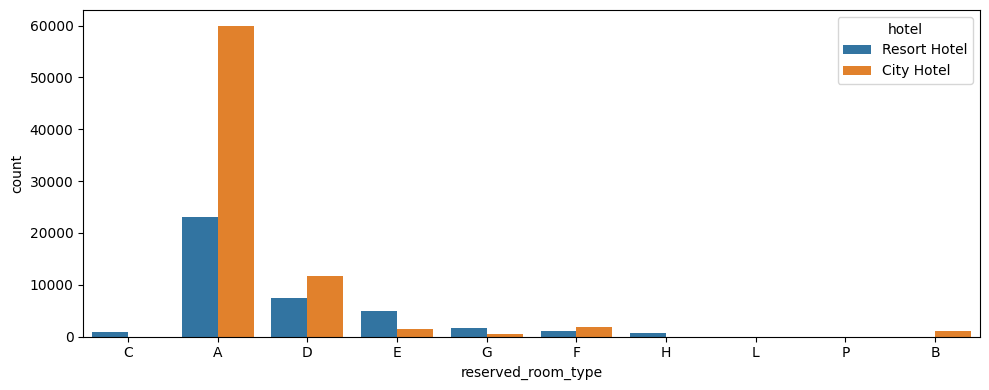

In [ ]:
sns.countplot(x=df_new['reserved_room_type'],hue=df_new['hotel'])

**Answer**

A type room has been preferred the most over others in both type of hotel

In [ ]:
(df_new['reserved_room_type']==df_new['assigned_room_type']).value_counts(normalize=True)

True     0.872846
False    0.127154
dtype: float64

**Also**
87 percent of the time room has been assigned as the reserved. and in rest times room type has been alloted as desired.

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116355 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        116355 non-null  object 
 1   is_canceled                  116355 non-null  object 
 2   lead_time                    116355 non-null  int64  
 3   arrival_date_year            116355 non-null  int64  
 4   arrival_date_month           116355 non-null  object 
 5   stays_in_weekend_nights      116355 non-null  int64  
 6   stays_in_week_nights         116355 non-null  int64  
 7   adults                       116355 non-null  int64  
 8   children                     116355 non-null  float64
 9   babies                       116355 non-null  int64  
 10  meal                         116355 non-null  object 
 11  country                      116355 non-null  object 
 12  market_segment               116355 non-null  object 
 13 

**Question**

 What is the percentage of total customers who change their bookings?

In [ ]:
df_new['booking_changes'].value_counts(normalize=True)*100

0     84.772464
1     10.673370
2      3.221177
3      0.787246
4      0.318852
5      0.100554
6      0.052426
7      0.026643
8      0.014610
9      0.006876
10     0.005157
13     0.004297
14     0.004297
15     0.002578
16     0.001719
17     0.001719
12     0.001719
11     0.001719
20     0.000859
21     0.000859
18     0.000859
Name: booking_changes, dtype: float64

**Answer**

Only 16% is the chance of change in booking which is not that much significant.

**Question**
What is the mode of payment through which customers make payments?

<Axes: ylabel='deposit_type'>

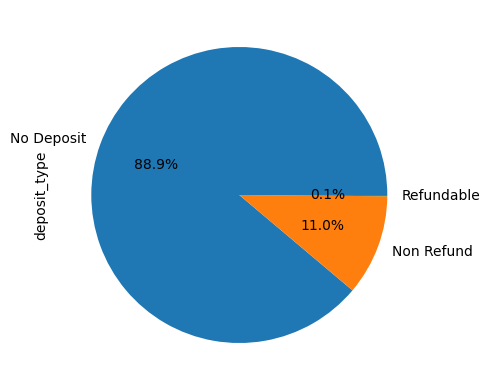

In [ ]:
#for payment method we will see deposit_type
df_new['deposit_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**Answer**

Major chunk of customers prefer on-site payment methods .

**Question**
In which month bookings have been done the most?

<Axes: >

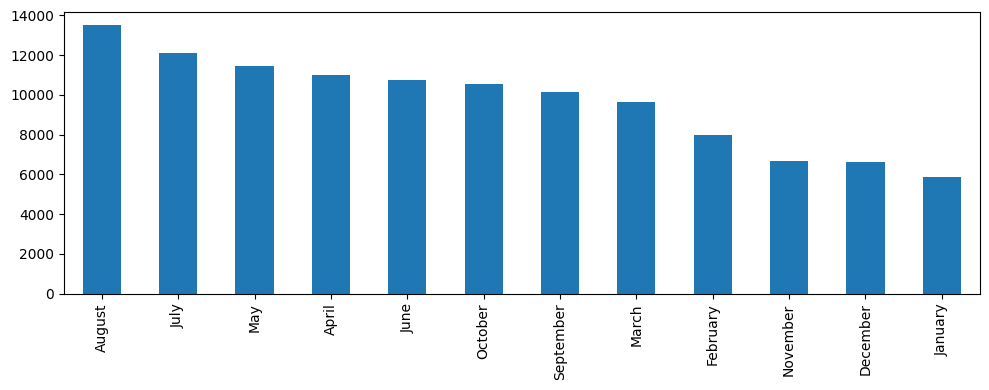

In [ ]:
#finding the month in which most number of bookings have been done
df_new['arrival_date_month'].value_counts().plot(kind='bar')

Text(0.5, 0, 'Customers')

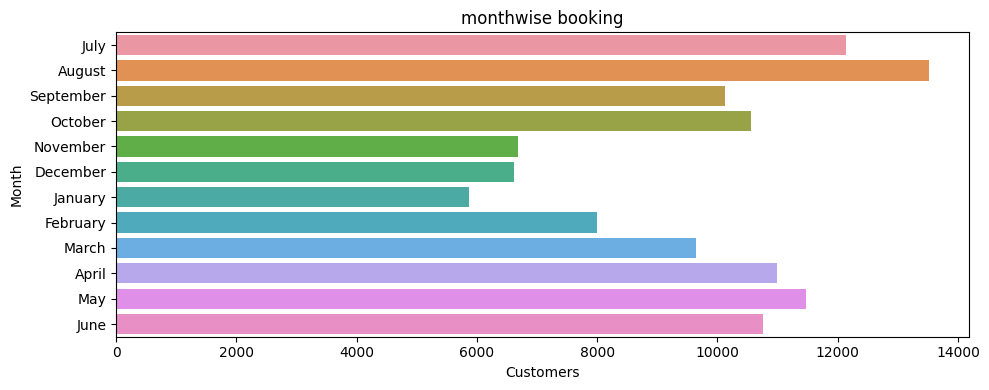

In [ ]:
sns.countplot(y=df_new['arrival_date_month'])
plt.title('monthwise booking')
plt.ylabel('Month')
plt.xlabel('Customers')

**Answer**

Most of the bookings are done in August

**Question**
Which type of customers generally do hotel bookings?

<Axes: ylabel='customer_type'>

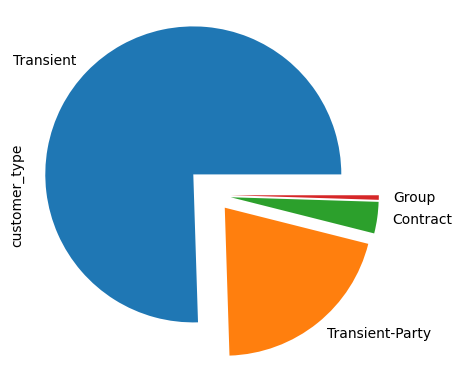

In [ ]:
#we will use pie chart for customer type segments
df_new['customer_type'].value_counts().plot(kind='pie',explode=[0.2,0.11,0.11,0.11],)

**Answer**

Mostly hotels are booked by transient customers

**Question**
What can we say about average daily rate?

<Axes: xlabel='arrival_date_month'>

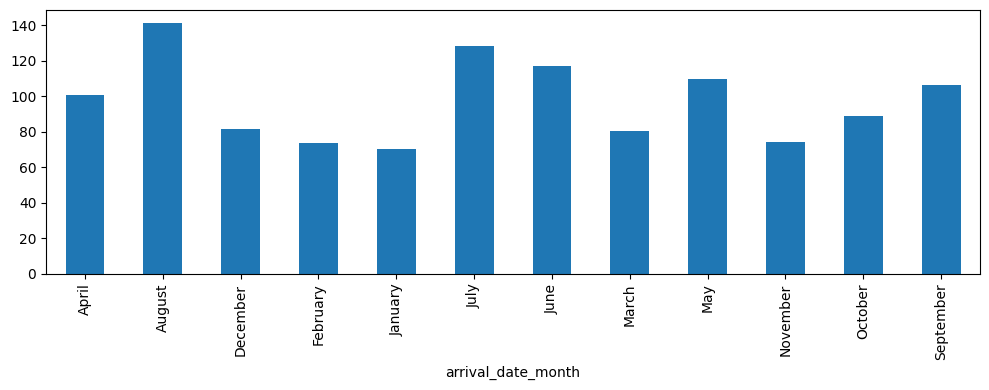

In [ ]:
#Interpreting adr columns for getting avarage daily rate insight
df_new.groupby('arrival_date_month')['adr'].mean().plot(kind='bar')

**Answer**

Average daily rate is highest for the month of august and

also we have already concluded that august has the highest number of bookings.

# **Conclusions and recomendations **


*   Customers are more for city type of hotel so City hotels should increase their availabilities.

*   There is 36 percent cancellations which is significant so hotels can provide some optional voucher instead of cancelling so that customers can be attracted and retained.

*  The demand for hotels in august month is most and adr is also highest for august month, so hotels should run promotional schemes for august month to attract customers.

* BB type of meal has been opted the most so, hotels can mak this complimentary so that customers can be retained.
* Customers make online bookings , so hotels should be listed online for easy bookings.
* Most customers make their payments at hotels, so hotels should provide online discounts for more digital.
* Transient customers are significantly very high so hotels should provide schemes for first timers to book intantly and get rewards.
* Repeated customers are very low, so hotels should provide better hospitality and services to retain their customers.


